In [9]:
#Librerias
from periodo_en_comun import devuelve_periodo_comun
from funcion_ets import ETS
import numpy as np
import os
import pandas as pd
import glob
from matriz_confusion_periodo import matriz_confusion_periodo

#Paths de archivos de las carpetas
gfs_lista = glob.glob('/home/fernando.huaranca/datosmunin/GFS_24hs/*.npz')
gsmap_lista = glob.glob('/home/fernando.huaranca/datosmunin/Gsmap_24hs/*.npz')

#Archivos comunes entre los dos periodos. 
#En los testeos hay un archivo que no funciona por un error proveniente desde un comienzo, 
#un error de los datos de gfs de 1 dia. 
Files = devuelve_periodo_comun(gfs_lista,gsmap_lista)

#----------------------------------------------------------------------------------------


#Lista donde se almacenan los archivos que fallaron
fallidos = []

#Carpetas donde se almacenan los datos de diferentes fuentes
folder_gfs = '/home/fernando.huaranca/datosmunin/GFS_24hs'
folder_gsmap = '/home/fernando.huaranca/datosmunin/Gsmap_24hs'

#-----Seleccionamos Areas------------------

#Area no tropical o de Clima de latitudes medias
lat_north_med = -20
lat_south_med =  -45
long_west_med = 285
long_east_med = 320

#Area Tropical o de Clima de latitudes tropicales
lat_north_trop = 7
lat_south_trop = -18
long_west_trop = 285
long_east_trop = 320


#------------------------------------------------------------------------------
#Extraemos las latitudes y longitudes de un archivo solo y luego usamos eso para
#todos los demas archivos

#Archivo unico
my_path_unico = '/home/fernando.huaranca/datosmunin/Gsmap_24hs/Gsmap_R0.25_24hs_2000-01-01.npz'
my_file_unico = np.load(my_path_unico)

#Extraemos las latitudes y longitudes de 1 archivo solo
latitudes = my_file_unico['latitudes']
longitudes = my_file_unico['longitudes']

#Definimos los indices y regiones 

#AREA DE CLIMA TROPICAL en LATITUDES ALTAS-------------------------
lat_index_trop = np.where((latitudes >= lat_south_trop) & (latitudes<=lat_north_trop))[0]
LAT_trop = latitudes[lat_index_trop] 

long_index_trop = np.where((longitudes >= long_west_trop) & (longitudes<=long_east_trop))[0]
LONG_trop = longitudes[long_index_trop]


#AREA DE CLIMA DE LATITUDES MEDIAS---------------
lat_index_med = np.where((latitudes >= lat_south_med) & (latitudes<=lat_north_med))[0]
LAT_med = latitudes[lat_index_med] 

long_index_med = np.where((longitudes >= long_west_med) & (longitudes<=long_east_med))[0]
LONG_med = longitudes[long_index_med]

#----------------------------------------------------------------------------------

#Para calcular porcentajes
k = 0 

#Cantidad de fechas 
total = len(Files)

#Listas donde se almacenan las series temporales
lista_modelo_tropical = []
lista_observado_tropical = []
lista_modelo_medios = []
lista_observado_medios = []





#-------------------------------------------------------------------------

#Bucle aca le hace esto a cada archivo
for file in Files:
   
   #-----Porcentaje----------------
   k = k +1
   porcentaje = (k/total)*100
   print(file,'  ',porcentaje,' %')

   #----Paths------------------------
   #Cargamos los archivos 
   path_modelo = os.path.join(folder_gfs,f'GFS_R0.25_24hs_{file}.npz')
   path_observacion = os.path.join(folder_gsmap,f'Gsmap_R0.25_24hs_{file}.npz')

   #---Abrir con numpy los archivos-------------
   #Cargamos los archivos
   file_modelo = np.load(path_modelo)
   file_observacion = np.load(path_observacion)

   #---Cargamos las precipitaciones-----------------
   #Precipitaciones del GFS Modelo
   pp_modelo = file_modelo['pp_daily']
   
   #Precipitaciones del Gsmap Observaciones
   pp_observacion= file_observacion['pp_daily']

      
   #---------Realizamos el SUBSET-------------------------


   
   try:

      #----MODELO----------------------------------

      #Definimos la Matriz de Clima_Tropical con GFS
      CLIMA_TROP_gfs = pp_modelo[lat_index_trop.min():lat_index_trop.max()+1,long_index_trop.min():long_index_trop.max()+1]

      #Definimos la Matriz de Clima Tropical con Gsmap
      CLIMA_TROP_gsmap = pp_observacion[lat_index_trop.min():lat_index_trop.max()+1,long_index_trop.min():long_index_trop.max()+1]

      #----OBSERVACION----------------
         
      #Definimos la Matriz de Clima_Tropical con GFS
      CLIMA_MEDIOS_gfs = pp_modelo[lat_index_med.min():lat_index_med.max()+1,long_index_med.min():long_index_med.max()+1]

      #Definimos la Matriz de Clima Tropical con Gsmap
      CLIMA_MEDIOS_gsmap = pp_observacion[lat_index_med.min():lat_index_med.max()+1,long_index_med.min():long_index_med.max()+1]

      #-------------------------------------------------------------   

      #Calculamos la primera media de cada matriz
      modelo_trop = np.mean(CLIMA_TROP_gfs)
      obs_trop = np.mean(CLIMA_TROP_gsmap)
      
      modelo_med = np.mean(CLIMA_MEDIOS_gfs)
      obs_med = np.mean(CLIMA_MEDIOS_gsmap)

      #Vamos agregando a las listas de manera de ir creando la serie de precipitaciones medias
      lista_modelo_tropical.append(modelo_trop)
      lista_observado_tropical.append(obs_trop)
      lista_modelo_medios.append(modelo_med)
      lista_observado_medios.append(obs_med)
         
   except Exception as e:

      #Muestro mensaje por pantalla
      print(f'Error al procesar el archivo {file}: {str(e)}')

      #Almacena los archivos fallidos en una lista
      fallidos.append(file)
   


2000-01-01    0.013709898546750754  %
2000-01-02    0.027419797093501508  %
2000-01-03    0.04112969564025226  %
2000-01-04    0.054839594187003016  %
2000-01-05    0.06854949273375377  %
2000-01-06    0.08225939128050452  %
2000-01-07    0.09596928982725528  %
2000-01-08    0.10967918837400603  %
2000-01-09    0.12338908692075677  %
2000-01-10    0.13709898546750754  %
2000-01-11    0.1508088840142583  %
2000-01-12    0.16451878256100905  %
2000-01-13    0.1782286811077598  %
2000-01-14    0.19193857965451055  %
2000-01-15    0.2056484782012613  %
2000-01-16    0.21935837674801206  %
2000-01-17    0.2330682752947628  %
2000-01-18    0.24677817384151354  %
2000-01-19    0.2604880723882643  %
2000-01-20    0.2741979709350151  %
2000-01-21    0.28790786948176583  %
2000-01-22    0.3016177680285166  %
2000-01-23    0.31532766657526734  %
2000-01-24    0.3290375651220181  %
2000-01-25    0.34274746366876885  %
2000-01-26    0.3564573622155196  %
2000-01-27    0.37016726076227036  %
2000-01

/home/fernando.huaranca/.conda/envs/tesis/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/fernando.huaranca/.conda/envs/tesis/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


2012-05-23    61.941321634219904  %
2012-05-24    61.95503153276666  %
2012-05-25    61.96874143131341  %
2012-05-26    61.982451329860154  %
2012-05-27    61.99616122840691  %
2012-05-28    62.00987112695366  %
2012-05-29    62.023581025500405  %
2012-05-30    62.03729092404716  %
2012-05-31    62.05100082259391  %
2012-06-01    62.064710721140656  %
2012-06-02    62.078420619687414  %
2012-06-03    62.09213051823417  %
2012-06-04    62.10584041678091  %
2012-06-05    62.119550315327665  %
2012-06-06    62.13326021387442  %
2012-06-07    62.146970112421165  %
2012-06-08    62.160680010967916  %
2012-06-09    62.17438990951467  %
2012-06-10    62.18809980806142  %
2012-06-11    62.20180970660817  %
2012-06-12    62.215519605154924  %
2012-06-13    62.229229503701674  %
2012-06-14    62.24293940224842  %
2012-06-15    62.256649300795175  %
2012-06-16    62.27035919934193  %
2012-06-17    62.284069097888676  %
2012-06-18    62.297778996435426  %
2012-06-19    62.31148889498218  %
2012-06

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Precipitaciones Medias en la Región Tropical')

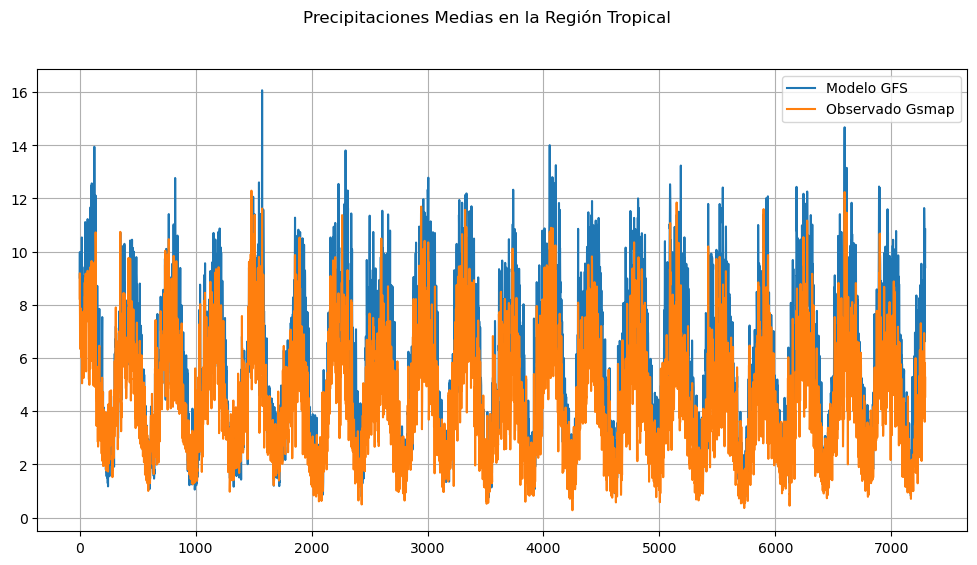

In [18]:
fig,ax = plt.subplots(figsize=(12,6))
ax.grid(True)
ax.plot(np.arange(0,len(Files)),lista_modelo_tropical,label='Modelo GFS')
ax.plot(np.arange(0,len(Files)),lista_observado_tropical,label='Observado Gsmap')
ax.legend()
plt.suptitle('Precipitaciones Medias en la Región Tropical')

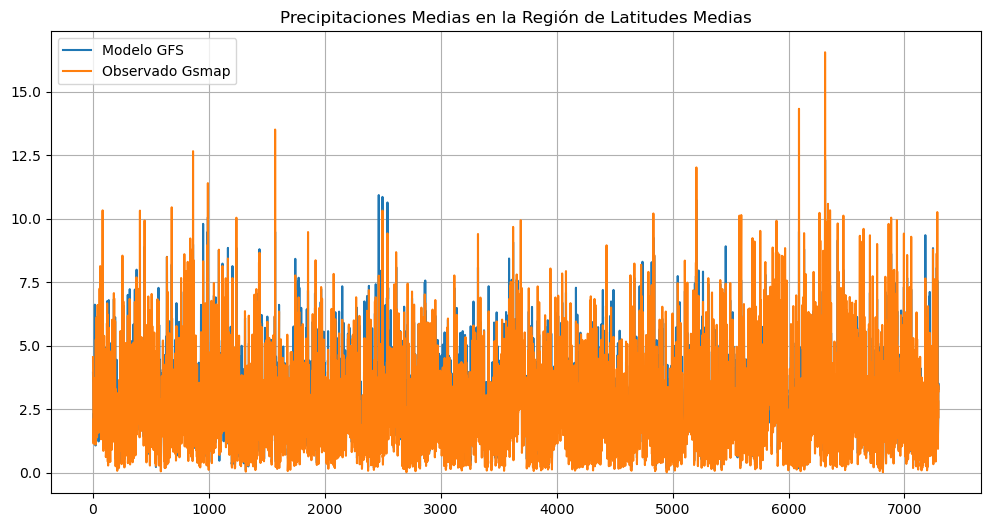

In [19]:
fig,ax = plt.subplots(figsize=(12,6))
ax.grid(True)
ax.plot(np.arange(0,len(Files)),lista_modelo_medios,label='Modelo GFS')
ax.plot(np.arange(0,len(Files)),lista_observado_medios,label='Observado Gsmap')
plt.title('Precipitaciones Medias en la Región de Latitudes Medias')
ax.legend()